In [72]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle


In [73]:
df1 = pd.read_csv("IPL Matches 2008-2021.csv")

In [74]:
df1.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,21-04-2008,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,22-04-2008,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,23-04-2008,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,24-04-2008,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,25-04-2008,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [75]:
df2 = pd.read_csv("IPL Ball-by-Ball 2008-2021.csv")

In [76]:
df2.head(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [77]:
df1.shape

(816, 17)

In [78]:
df2.shape

(193468, 18)

In [79]:
data=df1.merge(df2,on='id')
data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [80]:
data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'inning',
       'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [81]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [82]:
data1=data.groupby(['id','inning']).sum()['total_runs']
data1

id       inning
335982   1         222
         2          82
335983   1         240
         2         207
335984   1         129
                  ... 
1237178  2         132
1237180  1         189
         2         172
1237181  1         156
         2         157
Name: total_runs, Length: 1630, dtype: int64

In [83]:
data1=data1.reset_index()
data1

,id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1625,1237178,2,132
1626,1237180,1,189
1627,1237180,2,172
1628,1237181,1,156


In [84]:
data1=data1[data1.inning==1]
data1

,id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1620,1216547,1,201
1622,1237177,1,200
1624,1237178,1,131
1626,1237180,1,189


In [85]:
data=data.merge(data1,on='id')
data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,inning_y,total_runs_y
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,222
1,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,222
2,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,222
3,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,222
4,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,1,156
193464,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,1,156
193465,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians,1,156
193466,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,1,156


In [86]:
data=data[(data.inning_==2)]
data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,inning_y,total_runs_y
121,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222
122,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222
123,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,1,222
124,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,1,222
125,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,1,156
193373,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,1,156
193374,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,1,156
193375,1237181,Dubai,10-11-2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,...,0,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,1,156


In [150]:
import matplotlib.pyplot as plt
import seaborn as sn

<AxesSubplot:xlabel='over', ylabel='ball'>

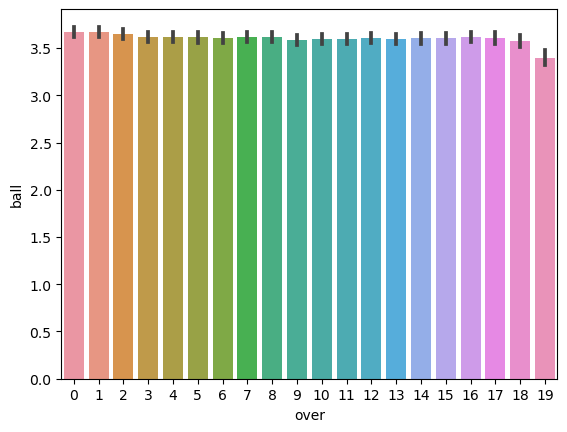

In [152]:
sn.barplot(x='over',y='ball',data=data)

<AxesSubplot:xlabel='total_runs_y', ylabel='count'>

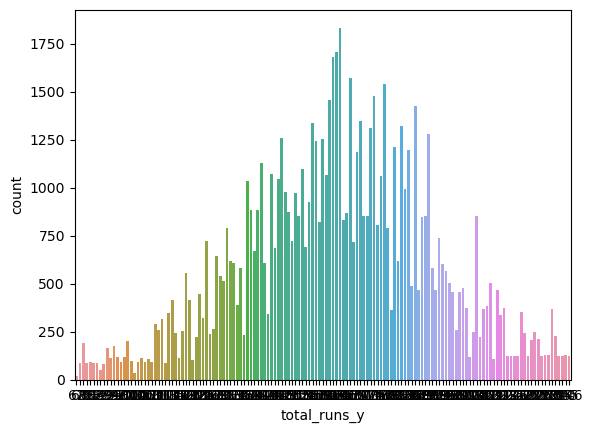

In [158]:
sn.countplot(x='total_runs_y',data=data)

<function matplotlib.pyplot.show(close=None, block=None)>

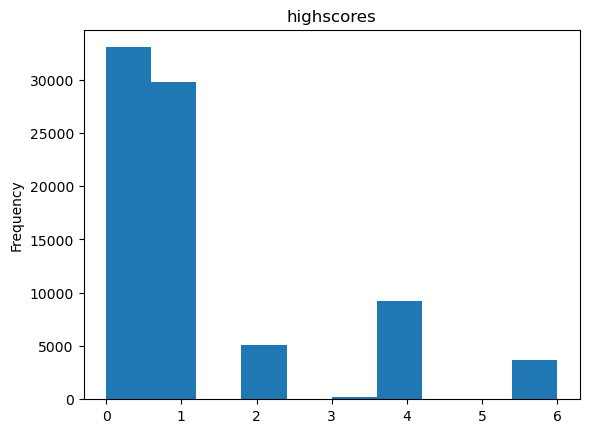

In [160]:
data['batsman_runs'].plot(kind='hist',title='highscores')
plt.show

In [161]:
corr=data.corr()
corr

,id,venue,neutral_venue,result_margin,over,ball,batsman_runs,extra_runs,total_runs_x,non_boundary,is_wicket,batting_team,bowling_team,total_runs_y,Ball_Number
id,1.000000,0.065149,-0.303230,-0.005277,0.012175,-0.003774,0.027658,-0.022169,0.023106,-0.000977,-0.000557,-0.040184,0.059428,0.164703,0.011964
venue,0.065149,1.000000,0.073160,-0.036897,0.004479,0.001598,0.005299,-0.002809,0.004735,0.001514,-0.003411,0.041386,0.104186,0.006348,0.004562
neutral_venue,-0.303230,0.073160,1.000000,-0.021067,-0.001248,0.001126,-0.024746,0.004386,-0.023986,0.002275,0.001557,0.029784,-0.011006,-0.158125,-0.001186
result_margin,-0.005277,-0.036897,-0.021067,1.000000,-0.008976,-0.000493,-0.057951,-0.006151,-0.059690,-0.003962,0.065967,0.038647,-0.042161,0.426666,-0.008997
over,0.012175,0.004479,-0.001248,-0.008976,1.000000,-0.015418,0.066710,-0.006523,0.065798,-0.003825,0.065252,-0.004782,0.008775,0.075555,0.998535
ball,-0.003774,0.001598,0.001126,-0.000493,-0.015418,1.000000,0.004240,-0.004761,0.003250,-0.003518,0.002471,0.000079,0.000384,0.005004,0.038706
batsman_runs,0.027658,0.005299,-0.024746,-0.057951,0.066710,0.004240,1.000000,-0.140387,0.977200,0.017433,-0.169378,-0.004214,0.000364,0.056809,0.066897
extra_runs,-0.022169,-0.002809,0.004386,-0.006151,-0.006523,-0.004761,-0.140387,1.000000,0.073032,-0.001534,-0.041369,-0.004076,-0.000338,-0.004766,-0.006777
total_runs_x,0.023106,0.004735,-0.023986,-0.059690,0.065798,0.003250,0.977200,0.073032,1.000000,0.017231,-0.179487,-0.005119,0.000294,0.056202,0.065933
non_boundary,-0.000977,0.001514,0.002275,-0.003962,-0.003825,-0.003518,0.017433,-0.001534,0.017231,1.000000,-0.001784,0.005077,-0.001231,-0.003049,-0.004013


<AxesSubplot:>

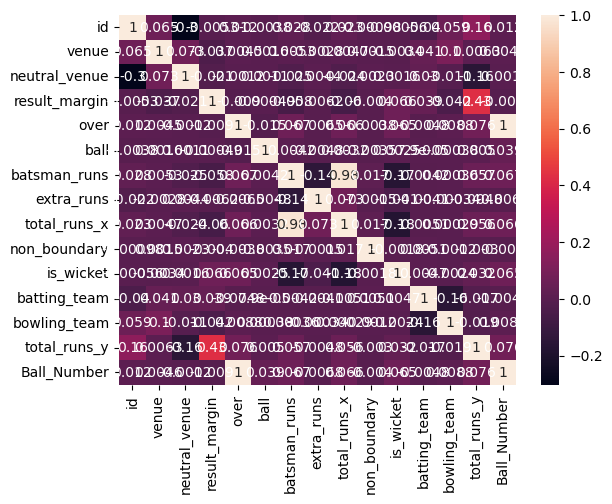

In [162]:
sn.heatmap(corr,annot=True)

<AxesSubplot:xlabel='batsman', ylabel='count'>

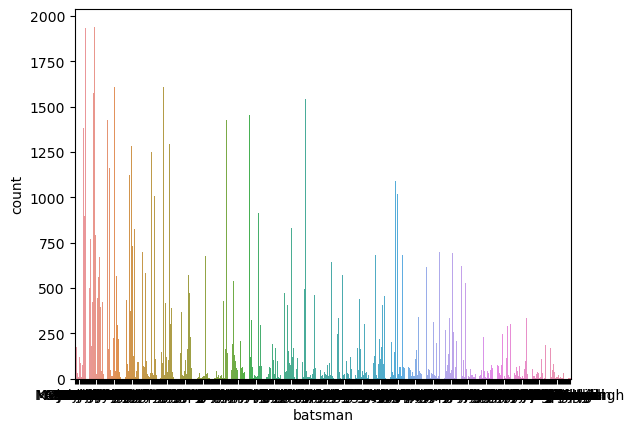

In [164]:
sn.countplot(x='batsman',data=data)

In [141]:
data.drop(['inning_x','inning_y','team1','team2'],axis='columns',inplace=True)
data.rename(columns={"total_runs":"Run_on_this_ball"},inplace=True)

KeyError: "['inning_x', 'inning_y', 'team1', 'team2'] not found in axis"

In [140]:
data

,id,city,date,player_of_match,venue,neutral_venue,toss_winner,toss_decision,winner,result,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,total_runs_y,Ball_Number
121,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,NaN,7,3,222,38
122,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,NaN,7,3,222,39
123,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,wides,7,3,222,40
124,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,wides,7,3,222,41
125,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,NaN,7,3,222,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,0,NaN,NaN,NaN,NaN,5,1,156,108
193373,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,0,NaN,NaN,NaN,NaN,5,1,156,109
193374,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,0,NaN,NaN,NaN,NaN,5,1,156,110
193375,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,1,caught,HH Pandya,AM Rahane,NaN,5,1,156,111


In [115]:
data.batting_team.unique()

array([7, 2, 1, 4, 6, 5, 0, 8, 3])

In [116]:
data.batting_team=data.batting_team.str.replace('Delhi Daredevils','Delhi Capitals')
data.bowling_team=data.bowling_team.str.replace('Delhi Daredevils','Delhi Capitals')

AttributeError: Can only use .str accessor with string values!

In [117]:
data.batting_team=data.batting_team.str.replace('Deccan Chargers','Sunrisers Hyderabad')
data.bowling_team=data.bowling_team.str.replace('Deccan Chargers','Sunrisers Hyderabad')

AttributeError: Can only use .str accessor with string values!

In [118]:
data.drop(data[data.batting_team=='Pune Warriors'].index,inplace=True)
data.drop(data[data.batting_team=='Rising Pune Supergiants'].index,inplace=True)
data.drop(data[data.batting_team== 'Gujarat Lions'].index,inplace=True)
data.drop(data[data.batting_team=='Rising Pune Supergiant'].index,inplace=True)

C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\2404399235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.batting_team=='Pune Warriors'].index,inplace=True)
C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\2404399235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.batting_team=='Rising Pune Supergiants'].index,inplace=True)
C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\2404399235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [119]:
data.batting_team.unique()

array([7, 2, 1, 4, 6, 5, 0, 8, 3])

In [120]:
data.bowling_team.unique()

array([3, 0, 5, 4, 7, 2, 6, 1])

In [121]:
data.drop(data[data.bowling_team=='Kochi Tuskers Kerala'].index,inplace=True)
data.drop(data[data.bowling_team=='Pune Warriors'].index,inplace=True)
data.drop(data[data.bowling_team=='Rising Pune Supergiants'].index,inplace=True)
data.drop(data[data.bowling_team== 'Gujarat Lions'].index,inplace=True)
data.drop(data[data.bowling_team=='Rising Pune Supergiant'].index,inplace=True)

C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\2770031697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.bowling_team=='Kochi Tuskers Kerala'].index,inplace=True)
C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\2770031697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.bowling_team=='Pune Warriors'].index,inplace=True)
C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\2770031697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [122]:
teams=data.bowling_team.unique()
teams

array([3, 0, 5, 4, 7, 2, 6, 1])

In [123]:
data.isna().sum()

id                      0
city                 1527
date                    0
player_of_match        27
venue                   0
neutral_venue           0
toss_winner             0
toss_decision           0
winner                 27
result                 27
result_margin        1519
eliminator             27
method              80064
umpire1                 0
umpire2                 0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
batsman_runs            0
extra_runs              0
total_runs_x            0
non_boundary            0
is_wicket               0
dismissal_kind      77071
player_dismissed    77071
fielder             78249
extras_type         76750
batting_team            0
bowling_team            0
total_runs_y            0
Ball_Number             0
dtype: int64

In [124]:
#data=data.dropna()

In [125]:
#data.isna().sum()

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81047 entries, 121 to 193376
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                81047 non-null  int64  
 1   city              79520 non-null  object 
 2   date              81047 non-null  object 
 3   player_of_match   81020 non-null  object 
 4   venue             81047 non-null  int32  
 5   neutral_venue     81047 non-null  int64  
 6   toss_winner       81047 non-null  object 
 7   toss_decision     81047 non-null  object 
 8   winner            81020 non-null  object 
 9   result            81020 non-null  object 
 10  result_margin     79528 non-null  float64
 11  eliminator        81020 non-null  object 
 12  method            983 non-null    object 
 13  umpire1           81047 non-null  object 
 14  umpire2           81047 non-null  object 
 15  over              81047 non-null  int64  
 16  ball              81047 non-null  int

In [127]:
data['Ball_Number']=(data['over'])*6+data['ball']
data

C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\4156510665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ball_Number']=(data['over'])*6+data['ball']


,id,city,date,player_of_match,venue,neutral_venue,toss_winner,toss_decision,winner,result,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,total_runs_y,Ball_Number
121,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,NaN,7,3,222,38
122,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,NaN,7,3,222,39
123,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,wides,7,3,222,40
124,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,wides,7,3,222,41
125,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,NaN,7,3,222,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,0,NaN,NaN,NaN,NaN,5,1,156,108
193373,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,0,NaN,NaN,NaN,NaN,5,1,156,109
193374,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,0,NaN,NaN,NaN,NaN,5,1,156,110
193375,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,1,caught,HH Pandya,AM Rahane,NaN,5,1,156,111


In [128]:
data_temp=data[['id','Run_on_this_ball','is_wicket']]

KeyError: "['Run_on_this_ball'] not in index"

In [ ]:
data.describe()

In [129]:
venues=data.venue.unique()
venues

array([13, 19,  8, 30,  7, 22, 20, 14,  4, 17, 26, 12, 28,  2, 16,  3, 18,
        1, 21,  0, 29,  9, 15, 10,  5, 27, 23, 11, 25, 24,  6])

In [130]:
len(venues)

31

In [131]:
data.venue=data.venue.str.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium')
data.venue=data.venue.str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali')
data.venue=data.venue.str.replace('Maharashtra Cricket Association Stadium','Subrata Roy Sahara Stadium')

AttributeError: Can only use .str accessor with string values!

In [132]:
len(venues)

31

In [133]:
le=LabelEncoder()
LE=LabelEncoder()

In [134]:
data['venue']=LE.fit_transform(data['venue'])
data['batting_team']=le.fit_transform(data['batting_team'])
data['bowling_team']=le.fit_transform(data['bowling_team'])
data

C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\2656479329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['venue']=LE.fit_transform(data['venue'])
C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\2656479329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['batting_team']=le.fit_transform(data['batting_team'])
C:\Users\jayaseelan\AppData\Local\Temp\ipykernel_11336\2656479329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,id,city,date,player_of_match,venue,neutral_venue,toss_winner,toss_decision,winner,result,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,total_runs_y,Ball_Number
121,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,NaN,7,3,222,38
122,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,NaN,7,3,222,39
123,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,wides,7,3,222,40
124,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,wides,7,3,222,41
125,335982,Bangalore,18-04-2008,BB McCullum,13,0,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,0,0,NaN,NaN,NaN,NaN,7,3,222,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,0,NaN,NaN,NaN,NaN,5,1,156,108
193373,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,0,NaN,NaN,NaN,NaN,5,1,156,109
193374,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,0,NaN,NaN,NaN,NaN,5,1,156,110
193375,1237181,Dubai,10-11-2020,TA Boult,6,0,Delhi Capitals,bat,Mumbai Indians,wickets,...,0,1,caught,HH Pandya,AM Rahane,NaN,5,1,156,111


In [142]:
LE.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [143]:
le.classes_

array([0, 1, 2, 3, 4, 5, 6, 7])

In [144]:
X=data[['batting_team','bowling_team','venue','Runs_Left','Balls_Left','Wickets_Left']]

KeyError: "['Runs_Left', 'Balls_Left', 'Wickets_Left'] not in index"

In [145]:
y=data['result']

In [146]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.25)

NameError: name 'X' is not defined

In [147]:
model=LogisticRegression()

In [148]:
model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [149]:
y_pred=model.predict(X_test)

NameError: name 'X_test' is not defined

In [165]:
accuracy_score(y_test,y_pred)

NameError: name 'y_test' is not defined

In [166]:
X_train

NameError: name 'X_train' is not defined

In [167]:
model.predict_proba([[6,0,24,78,60,3]])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [168]:
model.predict([[4,0,24,90,60,6]])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [169]:
teams

array([3, 0, 5, 4, 7, 2, 6, 1])

In [170]:
venues

array([13, 19,  8, 30,  7, 22, 20, 14,  4, 17, 26, 12, 28,  2, 16,  3, 18,
        1, 21,  0, 29,  9, 15, 10,  5, 27, 23, 11, 25, 24,  6])

In [171]:
pickle.dump(model,open('Model.pkl','wb'))

In [172]:
Model=pickle.load(open('Model.pkl','rb'))

In [173]:
Model.predict([[4,0,24,90,60,6]])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.